Firefly Algorithm

Name    : <br>
SID     :

# Install Dependicies

In [1]:
%pip install matplotlib numpy pillow

Note: you may need to restart the kernel to use updated packages.


# Fungsi F16

Fungsi F16 didapat kan dari <br>

https://www.mathworks.com/matlabcentral/fileexchange/125645-drawing-code-for-mathematical-benchmark-functions

In [2]:
def f16(x1, x2):
    return 4*x1**2 - 2.1*x1**4 + (1/3)*x1**6 + x1*x2 - 4*x2**2 + 4*x2**4

# Kode

## Import Library

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import math

## Parameter

Parameter di dalam firefly algorithm ada berapa jenis seperti yang dijelaskan di bawah ini

In [4]:
# Parameter Firefly Algorithm
n = 40  # Jumlah kunang-kunang dalam 1 populasi
max_iter = 50 # Jumlah iterasi
alpha = 0.2  # Mengontrol parameter randomness dalam pegerakan kunang kunang
gamma = 0.5 # Seberapa terang cahaya/penyerapan cahaya antar kunang kunang
beta_init = 0.5  # Mengontrol seberapa tinggi daya tarik antar kunang kunang

Parameter yang digunakan disini hanya digunakan untuk kebutuhan visualisasi

## Inisialisasi Populasi

Ada beberapa baris kode yang akan di implemetasi sebagai Inisialisi Populasi. <br>

1. np.random.seed berguna untuk memastikan bilangan acak setidaknya dapat di replikasi karena memiliki seed yang sama
2. Array untuk menyimpan para kunang kunang
3. Menghitung fitness fireflies itu sendiri

In [5]:
np.random.seed(42) # Memastikan bilangan acak dapat di replikasi
fireflies = np.random.uniform(-0.7, 0.7, (n, 2)) # Menghasilkan array n*2 dengan range -0.7 , 0.7
fitness = f16(fireflies[:, 0], fireflies[:, 1]) 
# Memanggi fungsi F16 dan memasukan x1 dan x2, fireflies[:,0] merupakan array berisi hasil x1 dan fireflies [:,1] merupakan array berisi hasil x2.

In [6]:
# Simpan data untuk animasi
history = []

## Firefly Algorithm

Firefly Algorithm adalah algoritma yang diilhami oleh perilaku kunang-kunang. Prinsip utamanya adalah bahwa kunang-kunang akan tertarik pada cahaya yang lebih terang, dan mereka bergerak menuju kunang-kunang yang lebih terang.

In [7]:
for t in range(max_iter): # Iterasi dalam firefly algorithm
    history.append(fireflies.copy()) # Kebutuhan animasi
    for i in range(n):
        for j in range(n):
            if fitness[i] > fitness[j]: # Akan memeriksa apakah kunang kunang 'i' lebih besar dari 'j'. Apabila benar maka posisi kunang kunang 'i' akan di perbaharui mendekati 'j'
                r = math.dist(fireflies[i],fireflies[j]) #Menghitung Euclidean distance antar kunang kunang
                beta = beta_init * np.exp(-gamma * r) # Menghitung beta ini bisa dilakukan dengan r atau r^2 
                fireflies[i] = fireflies[i] + beta * (fireflies[j] - fireflies[i]) + alpha * (np.random.rand(2) - 0.5) # Posisi kunang kunang diperbaharui
                fireflies[i] = np.clip(fireflies[i], -0.7, 0.7) # Membatasi kunang kunang dalam -0.7 dan 0.7
                fitness[i] = f16(fireflies[i, 0], fireflies[i, 1]) # Fitness Update

history.append(fireflies.copy())

## Buat GIF dari data yang telah ada

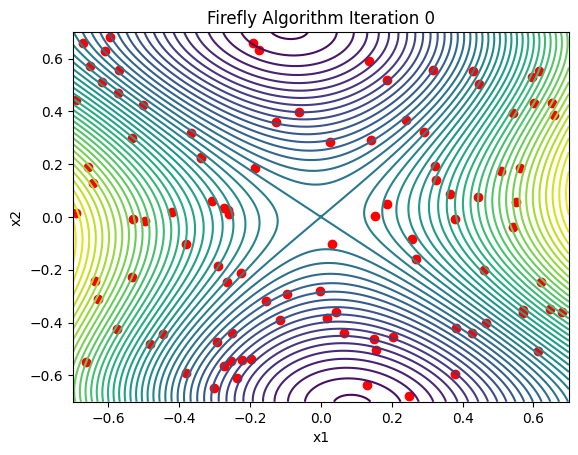

In [8]:
# Plot hasil dan animasi
X1 = np.linspace(-0.7, 0.7, 400)
X2 = np.linspace(-0.7, 0.7, 400)
X1, X2 = np.meshgrid(X1, X2)
Z = f16(X1, X2)

fig, ax = plt.subplots()
contour = ax.contour(X1, X2, Z, levels=50)
scatter = ax.scatter(fireflies[:, 0], fireflies[:, 1], c='red')

def update(frame):
    ax.clear()
    ax.contour(X1, X2, Z, levels=50)
    ax.scatter(history[frame][:, 0], history[frame][:, 1], c='red')
    ax.set_title('Firefly Algorithm Iteration {}'.format(frame))
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')

ani = FuncAnimation(fig, update, frames=len(history), repeat=False) # type: ignore

# Simpan animasi sebagai GIF
writer = PillowWriter(fps=5)
ani.save("firefly_algorithm_1.gif", writer=writer)